In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
 
img = cv2.imread('nanofibers.png',0)

#plt.imshow(img)
#plt.show()
#cv2_imshow(img)
img

array([[211, 230, 255, ...,   0,   0,  12],
       [ 10,  50, 113, ...,   0,   0,  12],
       [  9,   0,   0, ...,   0,   0,  12],
       ...,
       [254, 254, 254, ...,   0,   0,  12],
       [254, 254, 254, ...,   0,   0,  12],
       [254, 254, 254, ...,  19,  19,  27]], dtype=uint8)

In [0]:
size = np.size(img)
#size
img.shape

(190, 254)

In [0]:
skel = np.zeros(img.shape,np.uint8) # matriz de 0s del mismo tamaño que img (primer skeleton)
#np.size(skel)

In [0]:
ret,img = cv2.threshold(img,127,255,0) # binarizacion

ret,img

(127.0, array([[255, 255, 255, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0],
        [255, 255, 255, ...,   0,   0,   0]], dtype=uint8))

In [0]:
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
element

array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

In [0]:
#eroded = cv2.erode(img,element) # erosion
#cv2_imshow(eroded)

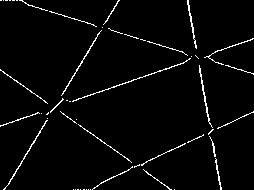

In [0]:
while(not done):
    eroded = cv2.erode(img,element) # erosion de la ultima imagen erosionada
    #cv2_imshow(eroded)
    temp = cv2.dilate(eroded,element) # dilatacion
    #cv2_imshow(temp)
    temp = cv2.subtract(img,temp) #la imagen erosionada y dilatada se resta con la ultima imagen erosionada
    #cv2_imshow(temp)
    skel = cv2.bitwise_or(skel,temp)
    #cv2_imshow(skel)
    img = eroded.copy()
    zeros = size - cv2.countNonZero(img) # Si ya se eliminaron todos los pixels blancos terminar
    if zeros==size:
        done = True

#cv2.imshow("skel",skel)
cv2_imshow(skel)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [0]:
'''
# transformada de distancia

from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('nanofibers.png')))
image_binary = image < 0.5
out_skeletonize = morphology.skeletonize(image_binary)
out_thin = morphology.thin(image_binary)


f, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')

ax1.imshow(out_skeletonize, cmap='gray')
ax1.set_title('Skeletonize')

ax2.imshow(out_thin, cmap='gray')
ax2.set_title('Thin')

#plt.savefig('/tmp/char_out.png')
plt.show()

#cv2_imshow(out_thin)

'''

"\n# transformada de distancia\n\nfrom skimage import img_as_float\nfrom skimage import io, color, morphology\nimport matplotlib.pyplot as plt\n\nimage = img_as_float(color.rgb2gray(io.imread('nanofibers.png')))\nimage_binary = image < 0.5\nout_skeletonize = morphology.skeletonize(image_binary)\nout_thin = morphology.thin(image_binary)\n\n\nf, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(10, 3))\n\nax0.imshow(image, cmap='gray')\nax0.set_title('Input')\n\nax1.imshow(out_skeletonize, cmap='gray')\nax1.set_title('Skeletonize')\n\nax2.imshow(out_thin, cmap='gray')\nax2.set_title('Thin')\n\n#plt.savefig('/tmp/char_out.png')\nplt.show()\n\n#cv2_imshow(out_thin)\n\n"

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:131: UserWarning: Possible sign loss when converting negative image of type float64 to positive image of type bool.
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to bool
  .format(dtypeobj_in, dtypeobj_out))


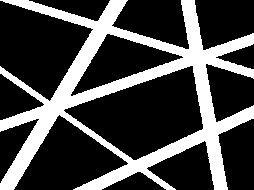

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [0]:
from skimage import img_as_bool, io, color, morphology
import matplotlib.pyplot as plt

#binarizacion
image = img_as_bool(color.rgb2gray(io.imread('nanofibers.png')))
#image = image.astype('uint8')

def cv2_imshow_bin(img):
  cv2_imshow(np.where(img==True, 255, img))

cv2_imshow_bin(image)
  
image

In [0]:
# Skeleton

skeleton, distance = morphology.medial_axis(image, mask=None, return_distance=True)
skeleton
#f, (ax0, ax1) = plt.subplots(1, 2)
#ax0.imshow(image, cmap='gray', interpolation='nearest')
#ax1.imshow(out, cmap='gray', interpolation='nearest')
#plt.show()

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

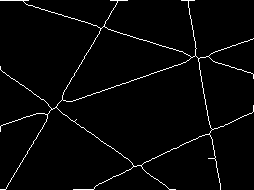

In [0]:
#skeleton out.astype('uint8')

cv2_imshow_bin(skeleton)

In [0]:
distance

array([[1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [5.        , 5.09901951, 5.38516481, ..., 0.        , 0.        ,
        0.        ],
       [6.        , 6.08276253, 6.32455532, ..., 0.        , 0.        ,
        0.        ],
       [7.        , 7.07106781, 7.28010989, ..., 0.        , 0.        ,
        0.        ]])

In [0]:
thinned = morphology.thin(image)
#thinned = morphology.thin(image)
#thinned.astype('uint8')

thinned

array([[ True,  True,  True, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

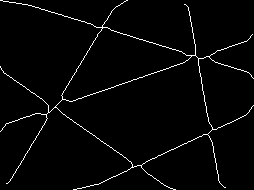

In [0]:
cv2_imshow_bin(thinned)

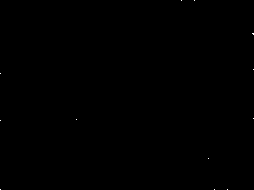

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [ True,  True, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [0]:
# pruning...

from scipy import ndimage

B1 = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]])
B2 = np.array([[0, 0, 0], [1, 1, 0], [1, 1, 0]])
B3 = np.array([[1, 1, 0], [1, 1, 0], [0, 0, 0]])
B4 = np.array([[1, 0, 0], [1, 1, 0], [1, 0, 0]])
B5 = np.array([[1, 1, 1], [0, 1, 0], [0, 0, 0]])
B6 = np.array([[0, 1, 1], [0, 1, 1], [0, 0, 0]])
B7 = np.array([[0, 0, 1], [0, 1, 1], [0, 0, 1]])
B8 = np.array([[0, 0, 0], [0, 1, 1], [0, 1, 1]])

A = image.copy().astype('int')

#X = A - ndimage.binary_hit_or_miss(A, structure1=B1)

A1 = A - ndimage.binary_hit_or_miss(A, structure1=B1)
A2 = A1 - ndimage.binary_hit_or_miss(A1, structure1=B2)
A3 = A2 - ndimage.binary_hit_or_miss(A2, structure1=B3)
A4 = A3 - ndimage.binary_hit_or_miss(A3, structure1=B4)
A5 = A4 - ndimage.binary_hit_or_miss(A4, structure1=B5)
A6 = A5 - ndimage.binary_hit_or_miss(A5, structure1=B6)
A7 = A6 - ndimage.binary_hit_or_miss(A6, structure1=B7)
A8 = A7 - ndimage.binary_hit_or_miss(A7, structure1=B8)
A9 = A8 - ndimage.binary_hit_or_miss(A8, structure1=B1)
A10 = A9 - ndimage.binary_hit_or_miss(A9, structure1=B2)

X = A - A10
cv2_imshow(np.where(X==True, 255, X))


structure1 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
structure2 = np.array([[0, 0, 0], [0, 1, 0], [1, 1, 0]])

#prunned = ndimage.binary_hit_or_miss(thinned, structure1=structure1, structure2=structure2).astype('int')



prunned = ndimage.binary_hit_or_miss(thinned, structure1=structure1)

prunned

In [0]:
#
'''
An = image.copy().astype('int')

Bn = []

Bn.append(np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]]))
Bn.append(np.array([[0, 0, 0], [1, 1, 0], [1, 1, 0]]))
Bn.append(np.array([[1, 1, 0], [1, 1, 0], [0, 0, 0]]))
Bn.append(np.array([[1, 0, 0], [1, 1, 0], [1, 0, 0]]))
Bn.append(np.array([[1, 1, 1], [0, 1, 0], [0, 0, 0]]))
Bn.append(np.array([[0, 1, 1], [0, 1, 1], [0, 0, 0]]))
Bn.append(np.array([[0, 0, 1], [0, 1, 1], [0, 0, 1]]))
Bn.append(np.array([[0, 0, 0], [0, 1, 1], [0, 1, 1]]))

#Bn[0]

for i in range(10):
  An = An - ndimage.binary_hit_or_miss(An, structure1=Bn[i%8])

cv2_imshow(np.where(An==True, 255, An))  
 
X = A - An
cv2_imshow(np.where(X==True, 255, X))
'''

#img = cv2.imread('nanofibers.png',0)

#dst = img.copy()

#img, cv2.ximgproc.thinning(img, dst)

#cv2_imshow(dst)

#prunned = morphology.remove_small_objects(thinned, min_size=1)

#cv2_imshow(np.where(prunned==True, 255, prunned))  

"\nAn = image.copy().astype('int')\n\nBn = []\n\nBn.append(np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]]))\nBn.append(np.array([[0, 0, 0], [1, 1, 0], [1, 1, 0]]))\nBn.append(np.array([[1, 1, 0], [1, 1, 0], [0, 0, 0]]))\nBn.append(np.array([[1, 0, 0], [1, 1, 0], [1, 0, 0]]))\nBn.append(np.array([[1, 1, 1], [0, 1, 0], [0, 0, 0]]))\nBn.append(np.array([[0, 1, 1], [0, 1, 1], [0, 0, 0]]))\nBn.append(np.array([[0, 0, 1], [0, 1, 1], [0, 0, 1]]))\nBn.append(np.array([[0, 0, 0], [0, 1, 1], [0, 1, 1]]))\n\n#Bn[0]\n\nfor i in range(10):\n  An = An - ndimage.binary_hit_or_miss(An, structure1=Bn[i%8])\n\ncv2_imshow(np.where(An==True, 255, An))  \n \nX = A - An\ncv2_imshow(np.where(X==True, 255, X))\n"

In [0]:
#cv2_imshow(np.where(prunned==True, 255, prunned))

In [0]:
import mahotas as mh


def branchedPoints(skel):
    branch1=np.array([[2, 1, 2], [1, 1, 1], [2, 2, 2]])
    branch2=np.array([[1, 2, 1], [2, 1, 2], [1, 2, 1]])
    branch3=np.array([[1, 2, 1], [2, 1, 2], [1, 2, 2]])
    branch4=np.array([[2, 1, 2], [1, 1, 2], [2, 1, 2]])
    branch5=np.array([[1, 2, 2], [2, 1, 2], [1, 2, 1]])
    branch6=np.array([[2, 2, 2], [1, 1, 1], [2, 1, 2]])
    branch7=np.array([[2, 2, 1], [2, 1, 2], [1, 2, 1]])
    branch8=np.array([[2, 1, 2], [2, 1, 1], [2, 1, 2]])
    branch9=np.array([[1, 2, 1], [2, 1, 2], [2, 2, 1]])
    br1=mh.morph.hitmiss(skel,branch1)
    br2=mh.morph.hitmiss(skel,branch2)
    br3=mh.morph.hitmiss(skel,branch3)
    br4=mh.morph.hitmiss(skel,branch4)
    br5=mh.morph.hitmiss(skel,branch5)
    br6=mh.morph.hitmiss(skel,branch6)
    br7=mh.morph.hitmiss(skel,branch7)
    br8=mh.morph.hitmiss(skel,branch8)
    br9=mh.morph.hitmiss(skel,branch9)
    return br1+br2+br3+br4+br5+br6+br7+br8+br9

def endPoints(skel):
    endpoint1=np.array([[0, 0, 0],
                        [0, 1, 0],
                        [2, 1, 2]])
    
    endpoint2=np.array([[0, 0, 0],
                        [0, 1, 2],
                        [0, 2, 1]])
    
    endpoint3=np.array([[0, 0, 2],
                        [0, 1, 1],
                        [0, 0, 2]])
    
    endpoint4=np.array([[0, 2, 1],
                        [0, 1, 2],
                        [0, 0, 0]])
    
    endpoint5=np.array([[2, 1, 2],
                        [0, 1, 0],
                        [0, 0, 0]])
    
    endpoint6=np.array([[1, 2, 0],
                        [2, 1, 0],
                        [0, 0, 0]])
    
    endpoint7=np.array([[2, 0, 0],
                        [1, 1, 0],
                        [2, 0, 0]])
    
    endpoint8=np.array([[0, 0, 0],
                        [2, 1, 0],
                        [1, 2, 0]])
    
    ep1=mh.morph.hitmiss(skel,endpoint1)
    ep2=mh.morph.hitmiss(skel,endpoint2)
    ep3=mh.morph.hitmiss(skel,endpoint3)
    ep4=mh.morph.hitmiss(skel,endpoint4)
    ep5=mh.morph.hitmiss(skel,endpoint5)
    ep6=mh.morph.hitmiss(skel,endpoint6)
    ep7=mh.morph.hitmiss(skel,endpoint7)
    ep8=mh.morph.hitmiss(skel,endpoint8)
    ep = ep1+ep2+ep3+ep4+ep5+ep6+ep7+ep8
    return ep

def pruning(skeleton, size):
    '''remove iteratively end points "size" 
       times from the skeleton
    '''
    for i in range(0, size):
        endpoints = endPoints(skeleton)
        endpoints = np.logical_not(endpoints)
        skeleton = np.logical_and(skeleton,endpoints)
    return skeleton

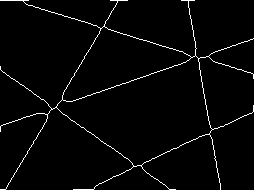

In [0]:
prunned = pruning(skeleton,100)
prunned

cv2_imshow_bin(prunned)

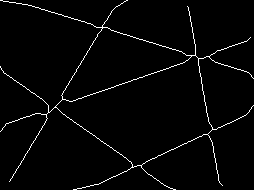

In [0]:
prunned2 = pruning(thinned,3)

cv2_imshow_bin(prunned2)

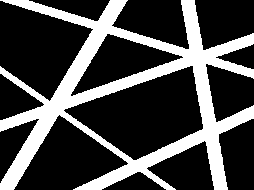

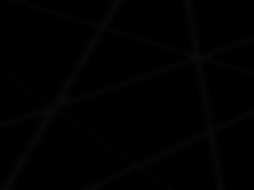

array([[1.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [5.       , 5.0990195, 5.3851647, ..., 0.       , 0.       ,
        0.       ],
       [6.       , 6.0827627, 6.3245554, ..., 0.       , 0.       ,
        0.       ],
       [7.       , 7.071068 , 7.28011  , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [0]:
# distance transform
from scipy import ndimage

#distanceMap = ndimage.distance_transform_edt(thinned)
#cv2_imshow(distanceMap)
#distanceMap

img = cv2.imread('nanofibers.png',0)
#ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU) # binarizacion
ret,img = cv2.threshold(img,127,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU) # binarizacion
#bw = cv.threshold(bw, 40, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

cv2_imshow(img)

distanceMap = cv2.distanceTransform(img, cv2.DIST_L2, 0)

cv2_imshow(distanceMap)

distanceMap

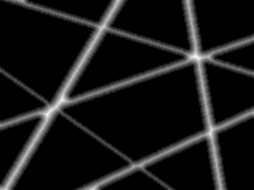

In [0]:
# para visualizar

distanceMapNormalized = distanceMap.copy()

cv2.normalize(distanceMap, distanceMapNormalized, 0, 255, cv2.NORM_MINMAX)

cv2_imshow(distanceMapNormalized)

#distanceMapNormalized

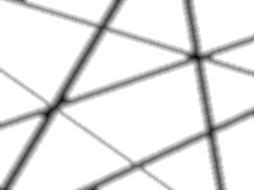

array([[231, 231, 231, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [133, 131, 124, ..., 255, 255, 255],
       [109, 107, 101, ..., 255, 255, 255],
       [ 85,  83,  78, ..., 255, 255, 255]], dtype=uint8)

In [0]:
#distanceMapGrays = distanceMapNormalized * 255

distanceMapInverted = np.invert(distanceMapNormalized.astype('uint8'))

cv2_imshow(distanceMapInverted)

distanceMapInverted

In [0]:
#merged = cv2.subtract(distanceMapInverted,thinned.astype('uint8'))
#cv2_imshow(merged)

#distanceMapInvertedNormalized = distanceMapInverted.copy()

#cv2.normalize(distanceMapInverted, distanceMapInvertedNormalized, 0, 1.0, cv2.NORM_MINMAX)

#distanceMap distanceMap.astype('uint8')

In [0]:
# detección de intersecciones

def neighbours(x,y,image):
    """Return 8-neighbours of image point P1(x,y), in a clockwise order"""
    img = image
    x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1;
    return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1], img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]
  
#out2,neighbours(0,0,out2)
#out2[-1][1]
#out2.shape, out2[190][0]

def getSkeletonIntersection(skeleton):
    """ Given a skeletonised image, it will give the coordinates of the intersections of the skeleton.
    
    Keyword arguments:
    skeleton -- the skeletonised image to detect the intersections of
    
    Returns: 
    List of 2-tuples (x,y) containing the intersection coordinates
    """
    # A biiiiiig list of valid intersections             2 3 4
    # These are in the format shown to the right         1 C 5
    #                                                    8 7 6 
    validIntersection = [[0,1,0,1,0,0,1,0],[0,0,1,0,1,0,0,1],[1,0,0,1,0,1,0,0],
                         [0,1,0,0,1,0,1,0],[0,0,1,0,0,1,0,1],[1,0,0,1,0,0,1,0],
                         [0,1,0,0,1,0,0,1],[1,0,1,0,0,1,0,0],[0,1,0,0,0,1,0,1],
                         [0,1,0,1,0,0,0,1],[0,1,0,1,0,1,0,0],[0,0,0,1,0,1,0,1],
                         [1,0,1,0,0,0,1,0],[1,0,1,0,1,0,0,0],[0,0,1,0,1,0,1,0],
                         [1,0,0,0,1,0,1,0],[1,0,0,1,1,1,0,0],[0,0,1,0,0,1,1,1],
                         [1,1,0,0,1,0,0,1],[0,1,1,1,0,0,1,0],[1,0,1,1,0,0,1,0],
                         [1,0,1,0,0,1,1,0],[1,0,1,1,0,1,1,0],[0,1,1,0,1,0,1,1],
                         [1,1,0,1,1,0,1,0],[1,1,0,0,1,0,1,0],[0,1,1,0,1,0,1,0],
                         [0,0,1,0,1,0,1,1],[1,0,0,1,1,0,1,0],[1,0,1,0,1,1,0,1],
                         [1,0,1,0,1,1,0,0],[1,0,1,0,1,0,0,1],[0,1,0,0,1,0,1,1],
                         [0,1,1,0,1,0,0,1],[1,1,0,1,0,0,1,0],[0,1,0,1,1,0,1,0],
                         [0,0,1,0,1,1,0,1],[1,0,1,0,0,1,0,1],[1,0,0,1,0,1,1,0],
                         [1,0,1,1,0,1,0,0]];
    image = skeleton.copy();
    #image = image/255;
    intersections = list();
    for x in range(1,len(image)-1):
        for y in range(1,len(image[x])-1):
            # If we have a white pixel
            if image[x][y] == 1:
                neighbours1 = neighbours(x,y,image);
                valid = True;
                if neighbours1 in validIntersection:
                    intersections.append((y,x));
    # Filter intersections to make sure we don't count them twice or ones that are very close together
    for point1 in intersections:
        for point2 in intersections:
            if (((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2) < 10**2) and (point1 != point2):
                intersections.remove(point2);
    # Remove duplicates
    intersections = list(set(intersections));
    return intersections;

In [0]:
#thinned.astype('uint8')

# eliminacion de intersecciones

intersecciones = getSkeletonIntersection(prunned2)

intersecciones

# determinar ancho

#intersecciones[0][0],intersecciones[0][1]

#out2[intersecciones[0][0]][intersecciones[0][1]] = 0

#cv2_imshow(out2)

[(132, 167),
 (62, 99),
 (103, 27),
 (195, 55),
 (55, 107),
 (46, 114),
 (212, 129),
 (209, 56)]

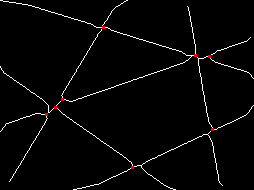

In [0]:
#thinnedInter = thinned.copy()

#for cross in intersecciones:
#  thinnedInter[cross[1]][cross[0]] = False
  
#thinnedInter

#cv2_imshow(np.where(thinnedInter==True, 255, thinnedInter))


RGB = np.zeros((prunned2.shape[0],prunned2.shape[1],3), dtype=np.uint8)
RGB[prunned2]  = [255,255,255]
RGB[~prunned2] = [0,0,0]

#cv2_imshow(RGB)

#RGB.shape

#RGB[0,0]

for cross in intersecciones:
  #thinnedInter[cross[1]][cross[0]] = False

  x = cross[1]
  y = cross[0]
  
  x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1;
  
  #vecinos = neighbours(cross[1],cross[0],thinned)
  
  #print(vecinos)
  RGB[x,y] = [0,0,255]
  RGB[x_1,y] = [0,0,255]
  RGB[x_1,y1] = [0,0,255]
  RGB[x][y1] = [0,0,255]
  RGB[x1][y1] = [0,0,255]
  RGB[x1][y] = [0,0,255]
  RGB[x1][y_1] = [0,0,255]
  RGB[x][y_1] = [0,0,255]
  RGB[x_1][y_1] = [0,0,255]
  
cv2_imshow(RGB)


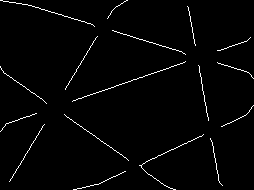

In [0]:
# ancho de intersecciones

def removeCross(cross, distanceMap, thinned):

  width = distanceMap[cross[1]][cross[0]]

  width = width.astype('uint8')

  for x in range(0,width*2+1):
    for y in range(0,width*2+1):
      #print(x - width, y - width)

      i = cross[1] - width + x
      j = cross[0] - width + y

      thinned[i][j] = False
      
  return thinned 

#cross = intersecciones[0]

uncrossed = prunned2.copy()

for cross in intersecciones:
  uncrossed = removeCross(cross, distanceMap, uncrossed)
    
cv2_imshow(np.where(uncrossed==True, 255, uncrossed))

In [0]:
# conteo de pixeles

rows,cols = uncrossed.shape

diameters = dict()

for x in range(0, rows):
    for y in range(0, cols):
      #print(uncrossed[x][y])
      if(uncrossed[x,y]):
        # obtener ancho
        #print(distanceMap[x,y].astype('uint8')*2)
        diameter = distanceMap[x,y].astype('uint8')*2
        
        if(diameter in diameters):
          diameters[diameter]+=1
        else:
          diameters[diameter]=1
        #else:
        #  diameters[diameter] += 1
        #print(diameter)
        
        
diameters

{2: 28, 4: 99, 6: 82, 8: 190, 10: 254, 12: 130, 14: 195}

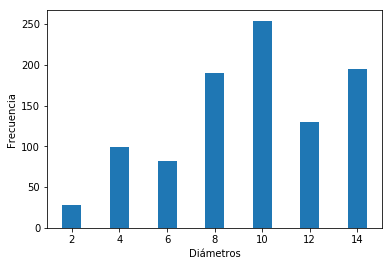

In [0]:
#histograma del diametros en pxs

import matplotlib.pyplot as plt

plt.bar(list(diameters.keys()), diameters.values())
plt.ylabel('Frecuencia')
plt.xlabel('Diámetros')
plt.show()

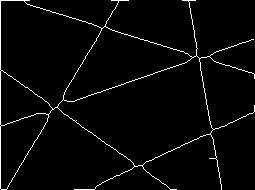

In [0]:
def myThinning(A, B):
  BLen = len(B)
  for i in range(BLen):
    A = A - ndimage.binary_hit_or_miss(A, structure1=B[i])
  return A

An = skeleton.copy().astype('int')

Bn = []

Bn.append(np.array([[-1, 0, 0], [1, 1, 0], [-1, 0, 0]]))
Bn.append(np.array([[-1, 1, -1], [0, 1, 0], [0, 0, 0]]))
Bn.append(np.array([[0, 0, -1], [0, 1, 1], [0, 0, -1]]))
Bn.append(np.array([[0, 0, 0], [0, 1, 0], [-1, 1, -1]]))

Bn.append(np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]]))
Bn.append(np.array([[0, 0, 1], [0, 1, 0], [0, 0, 0]]))
Bn.append(np.array([[0, 0, 0], [0, 1, 0], [0, 0, 1]]))
Bn.append(np.array([[0, 0, 0], [0, 1, 0], [1, 0, 0]]))

for i in range(3):
  myThinned = myThinning(An, Bn)

cv2_imshow_bin(myThinned)

In [0]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 2.0MB/s 
  Stored in directory: /root/.cache/pip/wheels/bb/0d/1e/c012eda7a9bb738a2fc531551681d680d31001abac3e14f3ed
Successfully built mahotas
